## Задание № 1

### Урок 1. Алгоритм линейной регрессии. Градиентный спуск

#### Задача № 1

Подберите скорость обучения (alpha) и количество итераций для градиентного спуска.


In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# возраст
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [79]:
# опыт
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
X.shape

(2, 10)

In [80]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [81]:
def gradient_s(X, y, W, alpha=1e-4, num_iter=5000, delta_err=1e-2):
    A = []
    n = X.shape[1]
    lucky_err = np.inf
    for i in range(num_iter):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        if i % 100 == 0:
            A.append((i, W.copy(), err))
        if (lucky_err - err) < delta_err:
            A.append((i, W.copy(), err))
            break
        else:
            lucky_err = err
    return A

In [82]:
A = gradient_s(X, y, np.array([1, 0.5]), alpha=1e-3, num_iter=8000, delta_err=1e-4)
A

[(0, array([1.1102, 0.84  ]), 3173.15),
 (100, array([ 7.43515582, 10.71754582]), 899.5990444359252),
 (200, array([11.44993589, 10.49282195]), 735.5540619653672),
 (300, array([14.98921624,  9.8634316 ]), 606.0048772266812),
 (400, array([18.17511588,  9.27626113]), 500.7989288428639),
 (500, array([21.04606457,  8.74617136]), 415.355423398327),
 (600, array([23.63334499,  8.26841272]), 345.9620646005472),
 (700, array([25.96499229,  7.83785632]), 289.6039104863001),
 (800, array([28.06626432,  7.44984037]), 243.83236130353217),
 (900, array([29.95992301,  7.10016181]), 206.65877484533297),
 (1000, array([31.66648131,  6.78503276]), 176.46806566379882),
 (1100, array([33.20442544,  6.50103962]), 151.94853425111427),
 (1200, array([34.59041507,  6.24510603]), 132.03487746741158),
 (1300, array([35.83946387,  6.01445961]), 115.86190418236986),
 (1400, array([36.9651021,  5.8066019]), 102.7269452082483),
 (1500, array([37.97952317,  5.61928129]), 92.05932434403572),
 (1600, array([38.893

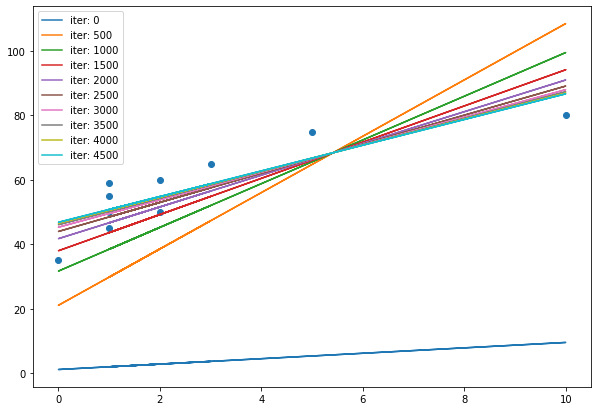

In [83]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(X[1], y)
step = len(A) % 10
for i in range(0, len(A), len(A) // 10):
    plt.plot(X[1], A[i][1][0] + A[i][1][1] * X[1], label=f'iter: {A[i][0]}')
plt.legend()

> введем переменную **delta_err = 1e-4** (точность изменения ошибки) как 4 знак после запятой.
> Если ошибка не менялась с данной точностью подбор можно остановить.
>
> Дальнейший анализ можно свести к подбору только коэффициента обучения **alpha**
>

In [84]:
alpha = 1e-4
A = gradient_s(X, y, np.array([1, 0.5]), alpha=alpha, num_iter=8000, delta_err=1e-4)
print(A[-1], alpha)
alpha = 1e-3
A = gradient_s(X, y, np.array([1, 0.5]), alpha=alpha, num_iter=8000, delta_err=1e-4)
print(A[-1], alpha)
alpha = 1e-2
A = gradient_s(X, y, np.array([1, 0.5]), alpha=alpha, num_iter=8000, delta_err=1e-4)
print(A[-1], alpha)
alpha = 1e-1
A = gradient_s(X, y, np.array([1, 0.5]), alpha=alpha, num_iter=8000, delta_err=1e-4)
print(A[-1], alpha)


(7900, array([27.84023753,  7.49157795]), 248.1484761422828) 0.0001
(4801, array([46.93370497,  3.96582312]), 45.985482731202794) 0.001
(589, array([47.13962846,  3.92779778]), 45.94219862456455) 0.01
(1, array([  3.156 , -36.5104]), 9346.1224) 0.1


> высокая сходимость получается при **alpha=0.01**

#### Задача № 2*

В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

```python
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1 / n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)
```

In [87]:
def gradient_sv(X, y, W1, alpha=1e-4, num_iter=5000, delta_err=1e-2):
    A = []
    n = X.shape[1]
    W = W1.copy()
    lucky_err = np.inf
    for i in range(num_iter):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        # for ii in range(W.shape[0]):
        #     W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        # new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]

        # W = W - (alpha * ((2 / n)  * np.sum(X * (y_pred - y))))
        # W = W - alpha * 2 * (X.T @ ((X @ W) - y)) / n
        W = W - alpha * 2 * np.dot(X.T, (np.dot(X, W) - y)) / n
        print(W)
        if i % 10 == 0:
            A.append((i, W.copy(), err))
        if (lucky_err - err) < delta_err:
            A.append((i, W.copy(), err))
            break
        else:
            lucky_err = err
    return A


In [89]:
np.dot(X, np.array([1, 0.5]))

ValueError: shapes (2,10) and (2,) not aligned: 10 (dim 1) != 2 (dim 0)

In [88]:
A = gradient_sv(X, y, np.array([1, 0.5]), alpha=1e-3, num_iter=8000, delta_err=1e-4)
A

ValueError: shapes (2,10) and (2,) not aligned: 10 (dim 1) != 2 (dim 0)